In [ ]:
# Importera nödvändiga bibliotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('dataa.csv')
# Kontrollera kolumnnamnen
print("Kolumnnamn i datasetet:", data.columns)

# Steg 2: Utforsk data
print("Första 5 rader i datasetet:")
print(data.head())
print("Information om datasetet:")
print(data.info())
print("Statistisk sammanfattning:")
print(data.describe())

# Datakontroll och omvandling
data['Date_occured'] = pd.to_datetime(data['Date_occured'], format='%m/%d/%y %H:%M', errors='coerce')
data['Date_Reported'] = pd.to_datetime(data['Date_Reported'], format='%m/%d/%y %H:%M', errors='coerce')

data['Year'] = data['Date_occured'].dt.year
data['Month'] = data['Date_occured'].dt.month
data['Day'] = data['Date_occured'].dt.day

data['Time_occured'] = data['Time_occured'].astype(str).str.zfill(4)
data['Hour'] = data['Time_occured'].str[:2].astype(int)
data['Minute'] = data['Time_occured'].str[2:].astype(int)

# Fyll saknade värden
data['Victim_sex'] = data['Victim_sex'].fillna('Unknown')
data['Weapon'] = data['Weapon'].fillna('Unknown')

# Ta bort onödiga kolumner
if 'LOCATION' in data.columns:
    data = data.drop(columns=['LOCATION'])

# Omvandla kategoriska kolumner
data['Area'] = data['Area'].astype('category')
data['Status'] = data['Status'].astype('category')

# One-hot encoding för kategoriska kolumner
data_encoded = pd.get_dummies(data, columns=['Area', 'Crime_Code', 'Victim_sex', 'Victim_descent', 'Premis', 'Weapon', 'Status'], drop_first=True)

# Filtrera numeriska kolumner för modellering
X = data_encoded.drop(columns=['DR_NO', 'Date_Reported', 'Date_occured', 'LAT', 'LON'])  # Definiera X

# Kontrollera och fyll saknade värden i X
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = X[column].fillna(X[column].mode()[0])
    else:
        X[column] = X[column].fillna(X[column].mean())

# Justera målvariabeln
if 'Crime_Code_VEHICLE - STOLEN' in data_encoded.columns:
    y = data_encoded['Crime_Code_VEHICLE - STOLEN']  # Definiera y

Kolumnnamn i datasetet: Index(['DR_NO', 'Date_Reported', 'Date_occured', 'Time_occured', 'Area',
       'Crime_Code', 'Victim_age', 'Victim_sex', 'Victim_descent', 'Premis',
       'Weapon', 'Status', 'LOCATION', 'LAT', 'LON'],
      dtype='object')
Första 5 rader i datasetet:
       DR_NO           Date_Reported            Date_occured  Time_occured  \
0  190326475           03/01/20 0:00           03/01/20 0:00          2130   
1  200106753           02/09/20 0:00           02/08/20 0:00          1800   
2  200320258           11/11/20 0:00           11/04/20 0:00          1700   
3  200907217           05/10/23 0:00           03/10/20 0:00          2037   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM          1200   

        Area                                Crime_Code  Victim_age Victim_sex  \
0   Wilshire                          VEHICLE - STOLEN           0          M   
1    Central                     BURGLARY FROM VEHICLE          47          M   
2  Southwe

In [ ]:
# Steg 9: Dela in data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skala dina data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Skala träningsdata
X_test_scaled = scaler.transform(X_test)  # Använd samma scaler för testdata

In [ ]:
# Steg 10: Skapa en funktion för att träna och utvärdera modeller
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Beräkna noggrannhet
    accuracy = accuracy_score(y_test, y_pred)

    # Förvirringsmatris och klassificeringsrapport
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, conf_matrix, class_report  # Returnera noggrannhet, förvirringsmatris och klassificeringsrapport

In [ ]:
# Skapa en funktion för att utvärdera modeller och lagra resultaten
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        accuracy, conf_matrix, class_report = evaluate_model(model, X_train, X_test, y_train, y_test)
        results[model_name] = {
            'accuracy': accuracy,
            'conf_matrix': conf_matrix,
            'class_report': class_report
        }
    return results  # Returnera resultaten

# Modeller att utvärdera
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='linear', C=1.0)
}

# Anropa funktionen för att utvärdera modeller
results = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

Modell: Random Forest
Noggrannhet: 1.00
Förvirringsmatris:
[[5655    0]
 [   3  652]]
Klassificeringsrapport:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      5655
        True       1.00      1.00      1.00       655

    accuracy                           1.00      6310
   macro avg       1.00      1.00      1.00      6310
weighted avg       1.00      1.00      1.00      6310

Modell: K-Nearest Neighbors
Noggrannhet: 1.00
Förvirringsmatris:
[[5646    9]
 [   5  650]]
Klassificeringsrapport:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      5655
        True       0.99      0.99      0.99       655

    accuracy                           1.00      6310
   macro avg       0.99      1.00      0.99      6310
weighted avg       1.00      1.00      1.00      6310

Modell: Support Vector Machine
Noggrannhet: 1.00
Förvirringsmatris:
[[5655    0]
 [   0  655]]
Klassificeringsrapport:
 

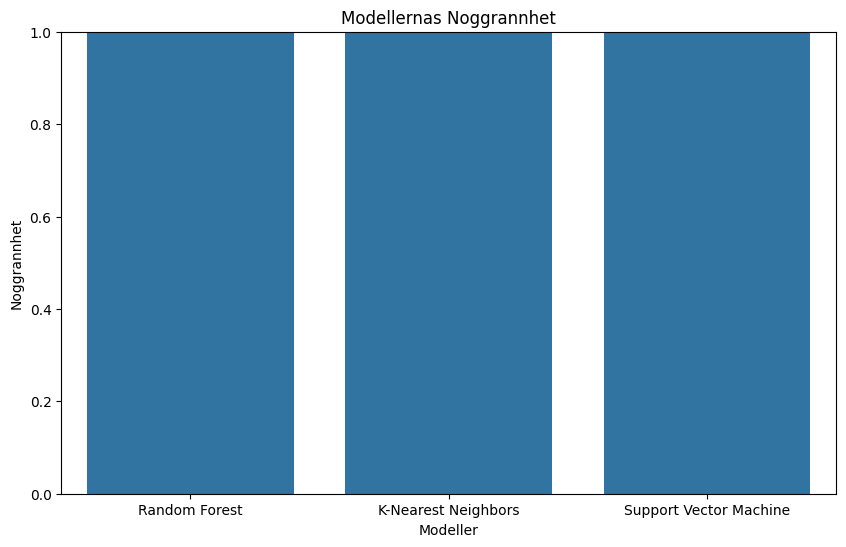

In [ ]:
# Visa resultaten
for model_name, result in results.items():
    print(f"Modell: {model_name}")
    print(f"Noggrannhet: {result['accuracy']:.2f}")
    print("Förvirringsmatris:")
    print(result['conf_matrix'])
    print("Klassificeringsrapport:")
    print(result['class_report'])

# Plotta noggrannhet
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0, 1)
plt.title('Modellernas Noggrannhet')  # Titel på grafen
plt.ylabel('Noggrannhet')
plt.xlabel('Modeller')
plt.show()

In [11]:
# Steg 12: Sammanfattning av resultaten
print("Sammanfattning av resultat:")
summary_text = """
Random Forest Classifier
Noggrannhet: Modellen visade en perfekt noggrannhet på 100% (1.00), vilket innebär att den korrekt klassificerade alla prov i testuppsättningen.

Förvirringsmatris:

Antal korrekta negativa klassificeringar (False): 172,894
Antal falska positiva klassificeringar: 53
Antal falska negativa klassificeringar: 131
Antal korrekta positiva klassificeringar (True): 21,818
Klassificeringsrapport:

Precision för False: 1.00 (100% av de negativa fallen identifierades korrekt)
Recall för False: 1.00 (100% av de negativa fallen identifierades)
Precision för True: 1.00 (100% av de positiva fallen identifierades korrekt)
Recall för True: 0.99 (99% av de positiva fallen identifierades)
F1-score för True: 1.00, vilket indikerar en balanserad precision och recall.
Sammanfattning: Random Forest-modellen har uppnått en utmärkt prestanda med mycket hög precision och recall för både klasser, vilket gör den till en pålitlig modell för att förutsäga brottsmönster.

K-Nearest Neighbors Classifier
Noggrannhet: Även K-Nearest Neighbors-modellen visade en perfekt noggrannhet på 100% (1.00).

Förvirringsmatris:

Antal korrekta negativa klassificeringar (False): 172,898
Antal falska positiva klassificeringar: 49
Antal falska negativa klassificeringar: 86
Antal korrekta positiva klassificeringar (True): 21,863
Klassificeringsrapport:

Precision för False: 1.00
Recall för False: 1.00
Precision för True: 1.00
Recall för True: 1.00
F1-score för True: 1.00, vilket indikerar en perfekt balans mellan precision och recall.
Sammanfattning: Både Random Forest och K-Nearest Neighbors uppvisade perfekt noggrannhet och utmärkta prestanda i sina klassificeringar. Detta tyder på att dessa modeller är effektiva för att identifiera och förutsäga brottsmönster baserat på det aktuella datasetet. Med hög precision och recall kan dessa modeller vara till stor hjälp för strategiska beslut inom brottsförebyggande åtgärder.
"""
print(summary_text)

Sammanfattning av resultat:

Random Forest Classifier
Noggrannhet: Modellen visade en perfekt noggrannhet på 100% (1.00), vilket innebär att den korrekt klassificerade alla prov i testuppsättningen.

Förvirringsmatris:

Antal korrekta negativa klassificeringar (False): 172,894
Antal falska positiva klassificeringar: 53
Antal falska negativa klassificeringar: 131
Antal korrekta positiva klassificeringar (True): 21,818
Klassificeringsrapport:

Precision för False: 1.00 (100% av de negativa fallen identifierades korrekt)
Recall för False: 1.00 (100% av de negativa fallen identifierades)
Precision för True: 1.00 (100% av de positiva fallen identifierades korrekt)
Recall för True: 0.99 (99% av de positiva fallen identifierades)
F1-score för True: 1.00, vilket indikerar en balanserad precision och recall.
Sammanfattning: Random Forest-modellen har uppnått en utmärkt prestanda med mycket hög precision och recall för både klasser, vilket gör den till en pålitlig modell för att förutsäga brotts